# Implementation of Gradient Descent on the housing data set.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [30]:
pd.set_option('display.max_columns',0)
house=pd.read_csv("Melbourne_housing_FULL.csv")
#To check any missing values are ther or not

In [31]:
#check any further missing values are there or not
house.isnull().any()


Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool

In [32]:
house.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [33]:
house_new=house.dropna()

In [34]:
house_new.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [35]:
house_new[house_new.duplicated()].shape

(0, 21)

In [36]:
house_new.shape

(8887, 21)

In [37]:
house_new

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3750.0,3.0,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3750.0,3.0,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
house_final= pd.DataFrame(house_new,columns=['Distance','Price'])
house_final
house_grad=sc.fit_transform(house_final)
house_grad=pd.DataFrame(house_grad)

# Gradient Descent with learning rate and ierations set to 0.0001 and 1000 respectively.
To find the best fit line using this technique.

At first mse is: 0.9999999999999978
After gradient descent analysis m,c is : (-0.1921808199725651, -8.795631722957603e-17)
new mse is: 0.9480645744841444


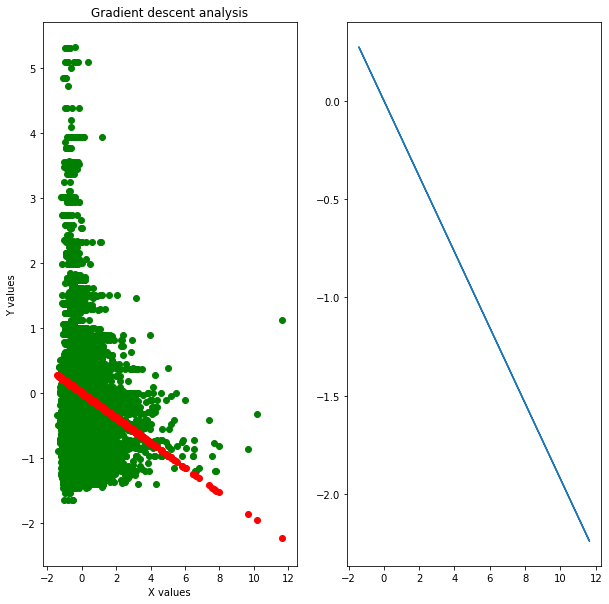

In [39]:
X=house_grad.iloc[:,1]
Y=house_grad.iloc[:,0]
def gradient(X,m,c,L,n):
    for i in range(n):
        y_pred=m*X+c
        Dm=-2/n*sum(X*(Y-y_pred))
        Dc=-2/n*sum(X-y_pred)
        m=m-L*Dm
        c=c-L*Dc
    return(m,c)

def mse(m,c,housepoint):
    err=0
    for i in range(len(housepoint)):
        x=housepoint[i,1]
        y=housepoint[i,0]
        err +=(y-(m * x + c))**2    
    return err/float(len(housepoint))

X=house_grad.iloc[:,1]
Y=house_grad.iloc[:,0]
m=0
c=0
L=0.0001
iterations=1000

housepoint=np.array(house_grad)

print("At first mse is: {}".format(mse(m,c,housepoint)))
print("After gradient descent analysis m,c is : {}".format(gradient(X,m,c,L,n=iterations)))

m_new,c_new=gradient(X,m,c,L,n=iterations)

print("new mse is: {}".format(mse(m_new,c_new,housepoint)))

Y_pred= m_new*X+c_new
fig=plt.figure(figsize=[10,10])
ax=fig.add_subplot(1,2,1)
plt.scatter(X,Y,color="green")
plt.scatter(X,Y_pred,color="red")
ax.set_xlabel("X values")
ax.set_ylabel("Y values")
ax.set_title("Gradient descent analysis")

#Ex 6. Display the Gradient and y-intercept value in the form y = mx+c 
ax=fig.add_subplot(1,2,2)
plt.plot(X,Y_pred)





# Find the BEST FIT line i.e., m and c of y=mx+c with least error using trial and error method i.e., 
Modify learning rate or iterations or both so as to make the best fit line.

In [40]:
#Find the BEST FIT line i.e., m and c of y=mx+c with least error using trial and error method i.e., 
#modify learning rate or iterations or both

m1=0
c1=0
list_of_iterations=[500,1000,1500,2000]
list_of_mse=[]
dict_mse={}
new_l=[0.0001,0.0002,0.0003,0.0004]
k=0


{0: [0.9480597522999972, 500, 0.0001, -0.19224264295840188, -8.640713144991695e-17], 1: [0.9465837602570681, 500, 0.0002, -0.2246853829833689, -1.1719353265604585e-16], 2: [0.9465423473433161, 500, 0.0003, -0.2301256648060486, -1.0583444121081703e-16], 3: [0.9465412001947183, 500, 0.0004, -0.23103210991103523, -1.1518155318412934e-16], 4: [0.9480645744841444, 1000, 0.0001, -0.1921808199725651, -8.795631722957603e-17], 5: [0.9465843057937221, 1000, 0.0002, -0.22464372057488832, -9.382140064850809e-17], 6: [0.9465423817287654, 1000, 0.0003, -0.23010994724547842, -1.2842668595247616e-16], 7: [0.9465412018908346, 1000, 0.0004, -0.23102744723666807, -1.1463482385565265e-16], 8: [0.9480661827296034, 1500, 0.0001, -0.19216022316756395, -8.356377626898378e-17], 9: [0.9465844886053654, 1500, 0.0002, -0.22462981831888082, -1.1581430259255416e-16], 10: [0.9465423933560821, 1500, 0.0003, -0.23010468290121638, -1.054378639953056e-16], 11: [0.9465412024720593, 1500, 0.0004, -0.23102587634572813, -1.

Text(0, 0.5, 'Y perfect values')

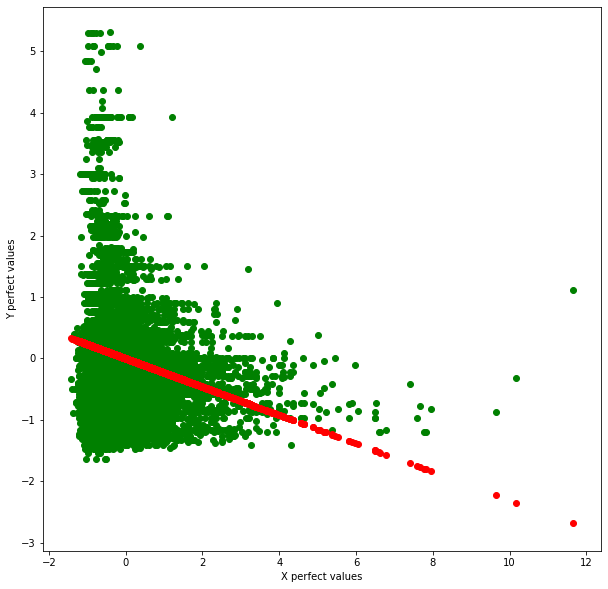

In [41]:
for i in list_of_iterations:
    for j in new_l:
        m2,c2=gradient(X,m1,c1,j,n=i)
        dict_mse.setdefault(k,[]).append(mse(m2,c2,housepoint))
        dict_mse.setdefault(k,[]).append(i)
        dict_mse.setdefault(k,[]).append(j)
        dict_mse.setdefault(k,[]).append(m2)
        dict_mse.setdefault(k,[]).append(c2)
        k+=1
print(dict_mse)
key_min=min(dict_mse, key=lambda k: dict_mse[k][0])
print(dict_mse[key_min][0])
m_perfect=dict_mse[key_min][3]
c_perfect=dict_mse[key_min][4]
print("m perfect is {0}, c_perfect is {1}".format(m_perfect,c_perfect))
Y_perfect= m_perfect*X+c_perfect

fig=plt.figure(figsize=[10,10])
ax=fig.add_subplot(1,1,1)
plt.scatter(X,Y,color="green")
plt.scatter(X,Y_perfect,color="red")
ax.set_xlabel("X perfect values")
ax.set_ylabel("Y perfect values")
